In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle
from random import sample

from utils import *

In [42]:
#selected subset of dates. 
val_dates = ['180409','180412','180414']
test_dates = ['180411', '180413']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/'
model_saving_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models'
CH = 23

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=256,CH = CH)

In [43]:
ls /home/bijanadmin/Desktop/Goose_data/

data_Goose_1st_15s_1/  data_Goose_1st_5s_2/   figures/
data_Goose_1st_15s_2/  data_Goose_all_15s_2/  loss_accuracy/
data_Goose_1st_2/      data_Goose_all_2/      model/
data_Goose_1st_5s_1/   data_Goose_all_5s_2/


In [44]:
# Balance Validation Dataset
sleep_files = []
move_files = []
for t in range(len(val_files)):
    if 'sleep' in val_files[t][0]:
        sleep_files.append(val_files[t])
    if 'move' in val_files[t][0]:
        move_files.append(val_files[t])

sleep_sample = sample(sleep_files, len(move_files))
val_2_files = sleep_sample+move_files
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_2_files, test_files,load_path, batch_size=256,CH = CH)

## Check balance
# count_sleep = 0
# count_move = 0
# for t in range(len(val_2_files)):
#     if 'sleep' in val_2_files[t][0]:
#         count_sleep+=1
#     if 'move' in val_2_files[t][0]:
#         count_move +=1 
# print(count_sleep, count_move)

In [45]:
len(train_loader), len(val_loader), len(test_loader)

(173, 9, 24)

In [33]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([256, 1, 100, 10])
torch.Size([256, 1])
256
256
256


date:180410, rec:006, time:5492.0, label:0.0


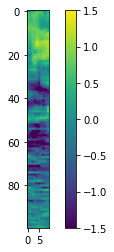

date:180323, rec:002, time:1507.0, label:1.0
date:180401, rec:001, time:530.0, label:0.0


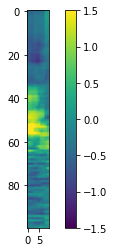

date:180325, rec:003, time:5092.0, label:1.0
date:180327, rec:001, time:4441.0, label:1.0
date:180331, rec:007, time:6528.0, label:0.0


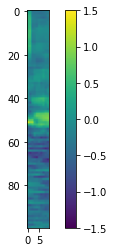

date:180330, rec:008, time:2766.0, label:0.0


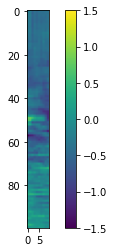

date:180322, rec:007, time:3299.0, label:0.0


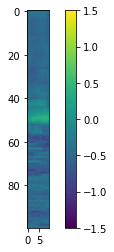

date:180325, rec:007, time:2606.0, label:0.0


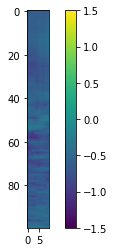

date:180327, rec:001, time:6992.0, label:0.0


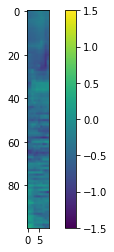

date:180330, rec:008, time:5535.0, label:0.0


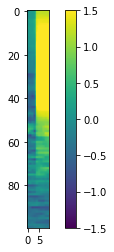

date:180327, rec:008, time:3802.0, label:0.0


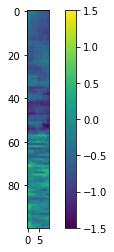

date:180327, rec:002, time:935.0, label:0.0


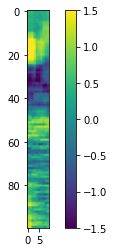

date:180327, rec:008, time:2632.0, label:0.0


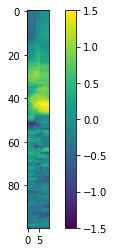

date:180322, rec:005, time:1365.0, label:1.0
date:180410, rec:003, time:6862.0, label:1.0
date:180324, rec:009, time:120.0, label:0.0


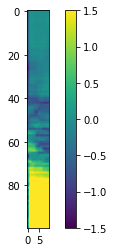

date:180330, rec:007, time:2392.0, label:1.0
date:180327, rec:007, time:5971.0, label:0.0


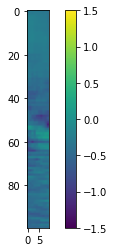

date:180323, rec:006, time:4579.0, label:1.0
date:180329, rec:001, time:5364.0, label:1.0
date:180401, rec:002, time:7046.0, label:1.0
date:180329, rec:001, time:3143.0, label:1.0
date:180330, rec:001, time:2532.0, label:1.0
date:180331, rec:007, time:5828.0, label:0.0


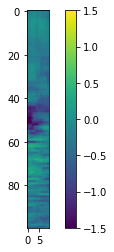

date:180331, rec:007, time:3487.0, label:0.0


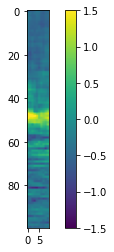

date:180324, rec:008, time:6184.0, label:0.0


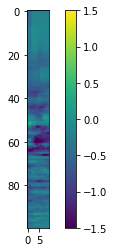

date:180325, rec:003, time:4563.0, label:0.0


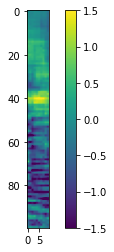

date:180410, rec:005, time:6712.0, label:1.0
date:180325, rec:001, time:860.0, label:0.0


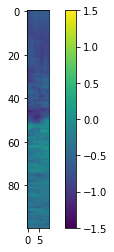

date:180323, rec:005, time:3973.0, label:1.0
date:180331, rec:007, time:5317.0, label:0.0


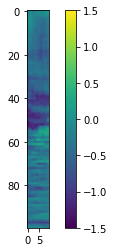

date:180323, rec:006, time:1516.0, label:1.0
date:180330, rec:009, time:4271.0, label:0.0


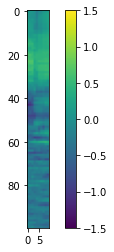

date:180327, rec:007, time:3780.0, label:0.0


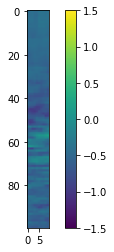

date:180330, rec:008, time:891.0, label:0.0


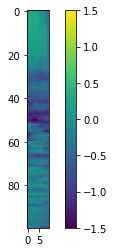

date:180330, rec:001, time:6596.0, label:1.0
date:180325, rec:002, time:100.0, label:1.0
date:180324, rec:004, time:4579.0, label:1.0
date:180410, rec:005, time:1317.0, label:1.0
date:180325, rec:005, time:4923.0, label:1.0
date:180401, rec:003, time:370.0, label:1.0
date:180325, rec:009, time:2210.0, label:0.0


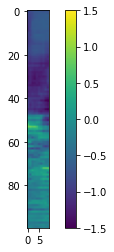

date:180325, rec:009, time:3896.0, label:1.0
date:180325, rec:001, time:3222.0, label:0.0


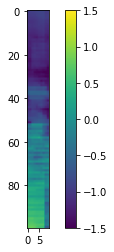

date:180322, rec:002, time:3659.0, label:1.0
date:180325, rec:001, time:320.0, label:0.0


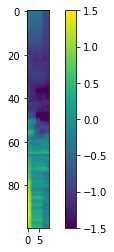

date:180325, rec:005, time:4206.0, label:0.0


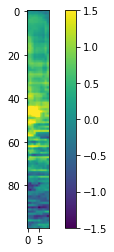

date:180325, rec:007, time:5623.0, label:0.0


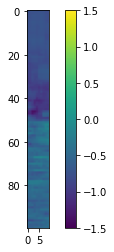

date:180410, rec:004, time:5099.0, label:1.0
date:180327, rec:001, time:6882.0, label:0.0


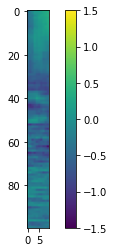

date:180325, rec:007, time:4663.0, label:0.0


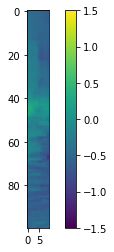

date:180325, rec:002, time:6015.0, label:1.0
date:180322, rec:007, time:3299.0, label:0.0


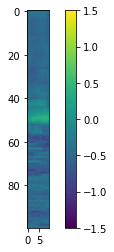

date:180327, rec:008, time:2422.0, label:0.0


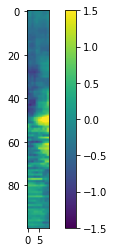

date:180327, rec:005, time:6248.0, label:0.0


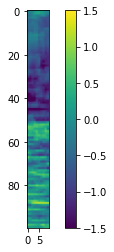

date:180331, rec:003, time:4488.0, label:1.0
date:180325, rec:003, time:490.0, label:1.0
date:180330, rec:005, time:5540.0, label:1.0
date:180325, rec:007, time:2223.0, label:1.0
date:180325, rec:005, time:1774.0, label:1.0
date:180329, rec:006, time:5731.0, label:1.0
date:180324, rec:008, time:3663.0, label:0.0


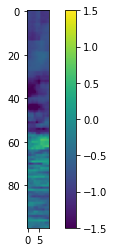

date:180327, rec:008, time:5003.0, label:0.0


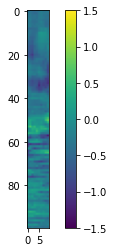

date:180327, rec:002, time:1460.0, label:1.0
date:180327, rec:006, time:4317.0, label:1.0
date:180327, rec:007, time:2390.0, label:0.0


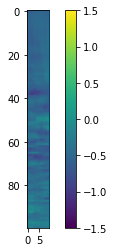

date:180327, rec:004, time:4464.0, label:1.0
date:180401, rec:001, time:2059.0, label:1.0
date:180410, rec:005, time:5947.0, label:1.0
date:180331, rec:007, time:6658.0, label:0.0


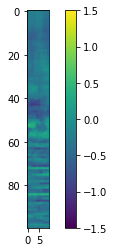

date:180327, rec:008, time:4192.0, label:0.0


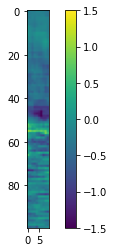

date:180323, rec:002, time:1707.0, label:1.0
date:180322, rec:007, time:4650.0, label:0.0


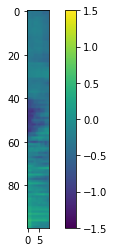

date:180330, rec:003, time:4184.0, label:1.0
date:180323, rec:002, time:6036.0, label:1.0
date:180331, rec:007, time:7068.0, label:0.0


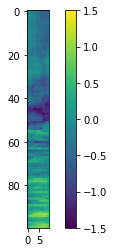

date:180324, rec:005, time:2490.0, label:1.0
date:180330, rec:005, time:956.0, label:1.0
date:180330, rec:009, time:448.0, label:0.0


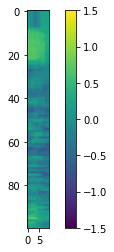

date:180331, rec:007, time:3057.0, label:0.0


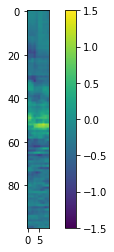

date:180324, rec:006, time:532.0, label:1.0
date:180330, rec:009, time:3530.0, label:0.0


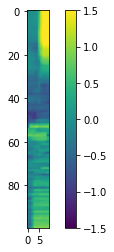

date:180327, rec:001, time:6752.0, label:0.0


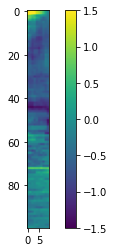

date:180330, rec:008, time:6935.0, label:0.0


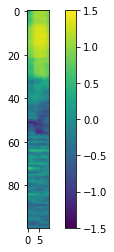

date:180330, rec:001, time:4127.0, label:1.0
date:180323, rec:004, time:5299.0, label:1.0
date:180327, rec:007, time:5451.0, label:0.0


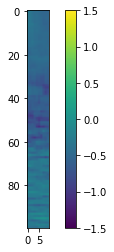

date:180331, rec:007, time:328.0, label:1.0
date:180331, rec:004, time:1012.0, label:1.0
date:180324, rec:008, time:5774.0, label:0.0


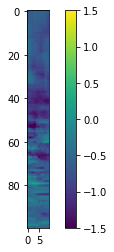

date:180331, rec:003, time:5888.0, label:1.0
date:180322, rec:007, time:4590.0, label:0.0


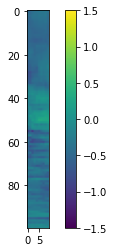

date:180322, rec:005, time:7109.0, label:1.0
date:180331, rec:003, time:1160.0, label:1.0
date:180325, rec:001, time:5990.0, label:1.0
date:180410, rec:006, time:4229.0, label:1.0
date:180322, rec:007, time:3880.0, label:0.0


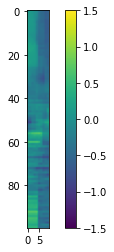

date:180327, rec:004, time:2604.0, label:0.0


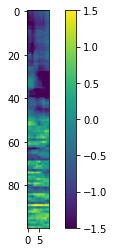

date:180330, rec:008, time:5575.0, label:0.0


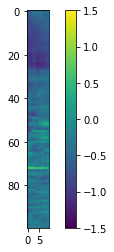

date:180322, rec:005, time:3171.0, label:1.0
date:180322, rec:004, time:431.0, label:0.0


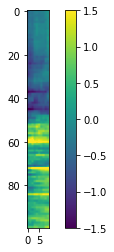

date:180331, rec:007, time:2817.0, label:0.0


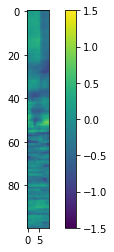

date:180327, rec:008, time:3052.0, label:0.0


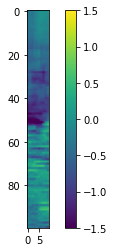

date:180324, rec:004, time:4389.0, label:1.0
date:180325, rec:007, time:3455.0, label:0.0


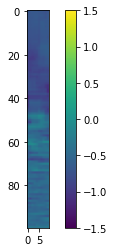

date:180330, rec:008, time:3596.0, label:0.0


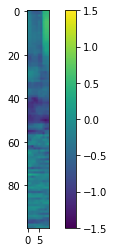

date:180325, rec:001, time:1670.0, label:0.0


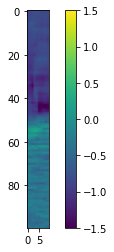

date:180331, rec:007, time:3087.0, label:0.0


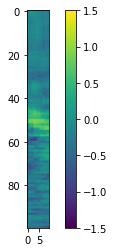

date:180324, rec:009, time:1067.0, label:0.0


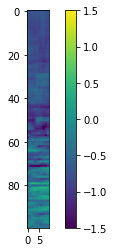

date:180331, rec:001, time:1340.0, label:0.0


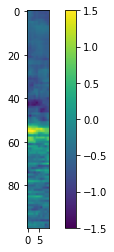

date:180329, rec:006, time:894.0, label:1.0
date:180401, rec:001, time:1070.0, label:0.0


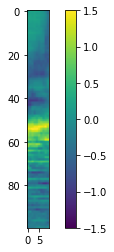

date:180331, rec:007, time:5738.0, label:0.0


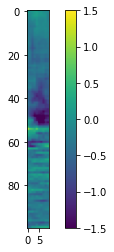

date:180327, rec:001, time:2852.0, label:1.0
date:180327, rec:004, time:490.0, label:1.0
date:180330, rec:001, time:6265.0, label:1.0
date:180323, rec:004, time:4559.0, label:1.0
date:180327, rec:008, time:6889.0, label:1.0
date:180325, rec:001, time:530.0, label:0.0


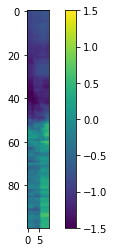

date:180327, rec:008, time:4092.0, label:0.0


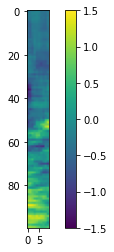

date:180322, rec:007, time:3329.0, label:0.0


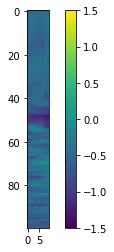

date:180330, rec:009, time:358.0, label:0.0


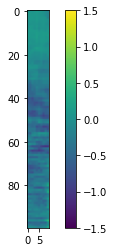

date:180331, rec:007, time:4697.0, label:0.0


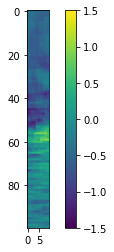

date:180331, rec:007, time:5287.0, label:0.0


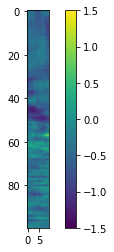

date:180401, rec:002, time:3676.0, label:1.0
date:180327, rec:005, time:410.0, label:1.0
date:180324, rec:001, time:3175.0, label:1.0


In [34]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

### Logistic regression with no regularization

In [46]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
CH = 23
timewindow = 10



Train loss for epoch 0: 0.5564559698104858
Val loss for epoch 0: 0.4867318570613861
Train loss for epoch 1: 0.5330657958984375
Val loss for epoch 1: 0.47047120332717896
1
Train loss for epoch 2: 0.5247448086738586
Val loss for epoch 2: 0.46371951699256897
2
Train loss for epoch 3: 0.518816351890564
Val loss for epoch 3: 0.4564143419265747
3
Train loss for epoch 4: 0.5147539377212524
Val loss for epoch 4: 0.45042625069618225
4
Train loss for epoch 5: 0.5132958889007568
Val loss for epoch 5: 0.4734153151512146
Train loss for epoch 6: 0.5100552439689636
Val loss for epoch 6: 0.46635571122169495
Train loss for epoch 7: 0.5087686777114868
Val loss for epoch 7: 0.4802781939506531
Train loss for epoch 8: 0.5080038905143738
Val loss for epoch 8: 0.46231609582901
Train loss for epoch 9: 0.5065910220146179
Val loss for epoch 9: 0.4820389151573181
Train loss for epoch 10: 0.5054816007614136
Val loss for epoch 10: 0.4612601399421692
Train loss for epoch 11: 0.5061493515968323
Val loss for epoch 11

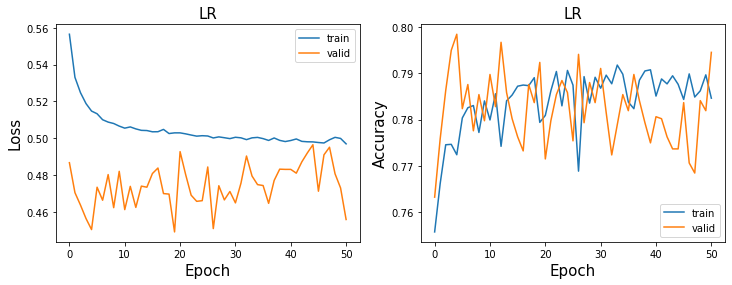

In [36]:

model = GLM(input_dim=100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)

    if train_loss < tol:
        break
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) 

In [47]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [0]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CH23_' in s and reg_alpha in s and '_valbalanced' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
0         19


/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH23_LOSSbce_REGnone0_EPOCH19_REDUCEsum_valbalanced.pt


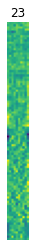

validation loss:0.4362579584121704 accuracy:0.8079930495221547
0.5
test loss:0.5191112160682678 accuracy:0.7481252037821976
0.74029994


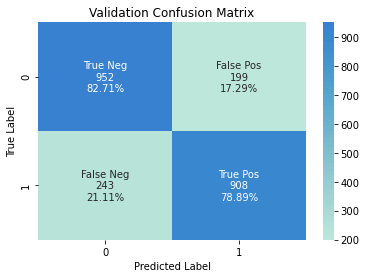

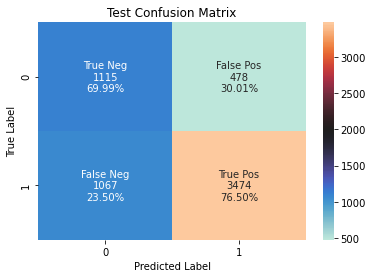

date:180412, rec:001, time:6942.0, label:1.0
Original data 62 CH


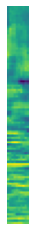

In [49]:


path = model_saving_path
best_epoch = 19
alpha = 0


# load best model
model = GLM(input_dim=100*10).to(device)
path = model_saving_path
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))

print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

## Show one feature
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

## Calculate validation accuracy and validation loss
val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
print(np.mean(np.concatenate(val_labels)))

## Calculate test accuracy and test loss
test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
print(np.mean(np.concatenate(test_labels)))

## Confusion matrix-validation
predictions_val = np.concatenate(val_preds)
labels_val = np.concatenate(val_labels)

df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

cm_val = confusion_matrix(labels_val, predictions_val)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_val.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
ax.set_title('Validation Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

## Confusion matrix-test
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

## Wrong Classifications
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_1[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

### Logistic regression with L2 regularization

In [52]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'
CH = 23



Train loss for epoch 0: 0.5535995960235596
Val loss for epoch 0: 0.4582354724407196
Train loss for epoch 1: 0.5342720746994019
Val loss for epoch 1: 0.45292001962661743
1
Train loss for epoch 2: 0.5264143347740173
Val loss for epoch 2: 0.4566824436187744
Train loss for epoch 3: 0.5203721523284912
Val loss for epoch 3: 0.4526684880256653
3
Train loss for epoch 4: 0.5176114439964294
Val loss for epoch 4: 0.4595756530761719
Train loss for epoch 5: 0.5150628089904785
Val loss for epoch 5: 0.4544350206851959
Train loss for epoch 6: 0.5134269595146179
Val loss for epoch 6: 0.4549618065357208
Train loss for epoch 7: 0.5139939188957214
Val loss for epoch 7: 0.4603557586669922
Train loss for epoch 8: 0.511467456817627
Val loss for epoch 8: 0.4643913805484772
Train loss for epoch 9: 0.5107200741767883
Val loss for epoch 9: 0.4529792368412018
Train loss for epoch 10: 0.5105430483818054
Val loss for epoch 10: 0.45592376589775085
Train loss for epoch 11: 0.509563684463501
Val loss for epoch 11: 0.4

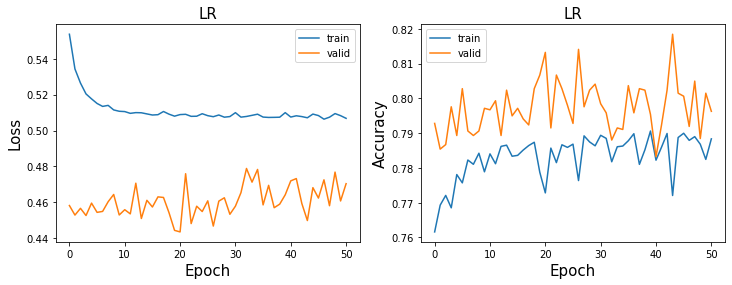

Train loss for epoch 0: 0.6197842359542847
Val loss for epoch 0: 0.5351185202598572
Train loss for epoch 1: 0.5891786217689514
Val loss for epoch 1: 0.5347736477851868
1
Train loss for epoch 2: 0.5876196026802063
Val loss for epoch 2: 0.5375648736953735
Train loss for epoch 3: 0.5843530297279358
Val loss for epoch 3: 0.5280053615570068
3
Train loss for epoch 4: 0.5849370360374451
Val loss for epoch 4: 0.525150716304779
4
Train loss for epoch 5: 0.5837852358818054
Val loss for epoch 5: 0.538911759853363
Train loss for epoch 6: 0.5829387307167053
Val loss for epoch 6: 0.5297369956970215
Train loss for epoch 7: 0.5841190814971924
Val loss for epoch 7: 0.5336058735847473
Train loss for epoch 8: 0.5836136341094971
Val loss for epoch 8: 0.5331688523292542
Train loss for epoch 9: 0.5843554139137268
Val loss for epoch 9: 0.5367528200149536
Train loss for epoch 10: 0.5822703838348389
Val loss for epoch 10: 0.5470613837242126
Train loss for epoch 11: 0.5829972624778748
Val loss for epoch 11: 0.5

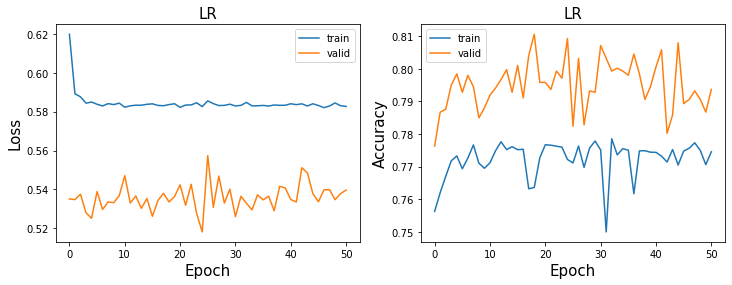

Train loss for epoch 0: 0.6625262498855591
Val loss for epoch 0: 0.5890802145004272
Train loss for epoch 1: 0.6249092817306519
Val loss for epoch 1: 0.5844076871871948
1
Train loss for epoch 2: 0.6216745376586914
Val loss for epoch 2: 0.5792749524116516
2
Train loss for epoch 3: 0.6206098794937134
Val loss for epoch 3: 0.585954487323761
Train loss for epoch 4: 0.6226975321769714
Val loss for epoch 4: 0.5852506756782532
Train loss for epoch 5: 0.6205435991287231
Val loss for epoch 5: 0.5864315032958984
Train loss for epoch 6: 0.6194340586662292
Val loss for epoch 6: 0.5838449001312256
Train loss for epoch 7: 0.6192544102668762
Val loss for epoch 7: 0.5801631212234497
Train loss for epoch 8: 0.6195671558380127
Val loss for epoch 8: 0.5842750072479248
Train loss for epoch 9: 0.619820773601532
Val loss for epoch 9: 0.5802842974662781
Train loss for epoch 10: 0.6190476417541504
Val loss for epoch 10: 0.5880209803581238
Train loss for epoch 11: 0.623295247554779
Val loss for epoch 11: 0.5839

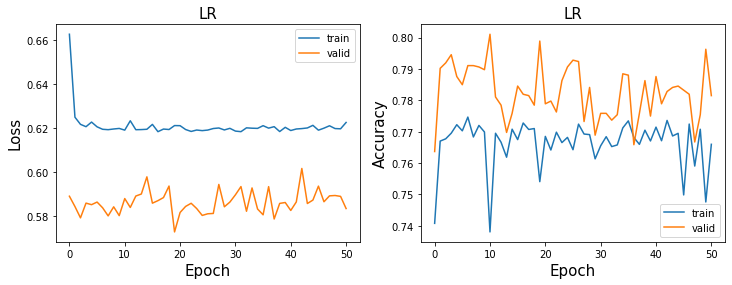

In [53]:
for alpha in alphas:
    model = GLM(100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) 

In [54]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [1,50,100]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CH23_' in s and reg_alpha in s and '_valbalanced' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1         20
50        24
100       19


/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH23_LOSSbce_REGl21_EPOCH20_REDUCEsum_valbalanced.pt


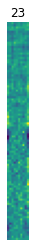

validation loss:0.44354739785194397 accuracy:0.8132059079061685
0.5
test loss:0.5088357329368591 accuracy:0.7582328007825236
0.74029994


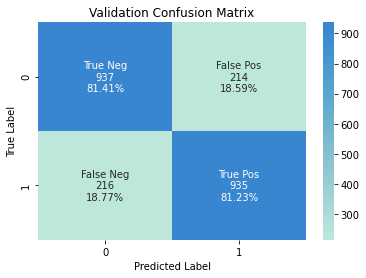

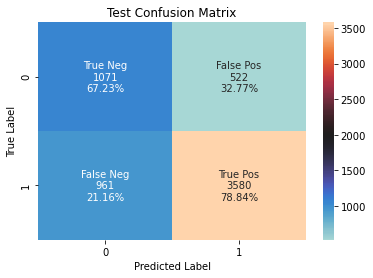

date:180412, rec:001, time:6942.0, label:1.0
Original data 62 CH


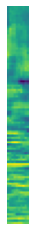

/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH23_LOSSbce_REGl250_EPOCH24_REDUCEsum_valbalanced.pt


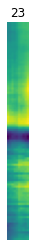

validation loss:0.5181652903556824 accuracy:0.8092962641181581
0.5
test loss:0.5693067312240601 accuracy:0.747147049233779
0.74029994


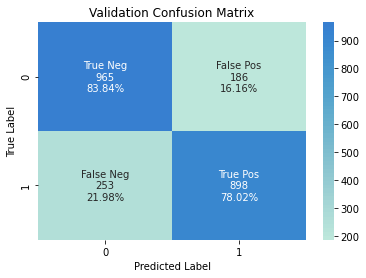

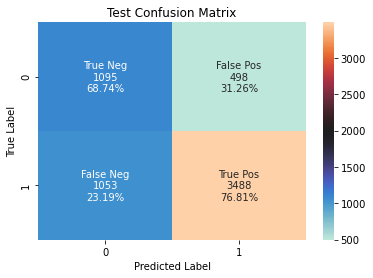

date:180412, rec:001, time:6942.0, label:1.0
Original data 62 CH


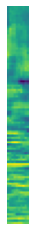

/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH23_LOSSbce_REGl2100_EPOCH19_REDUCEsum_valbalanced.pt


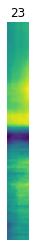

validation loss:0.5728970170021057 accuracy:0.7988705473501303
0.5
test loss:0.5957480072975159 accuracy:0.7508966416693837
0.74029994


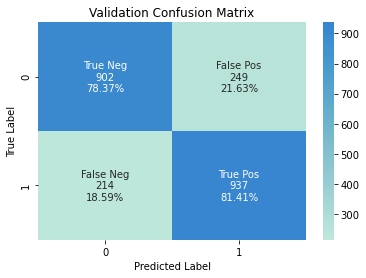

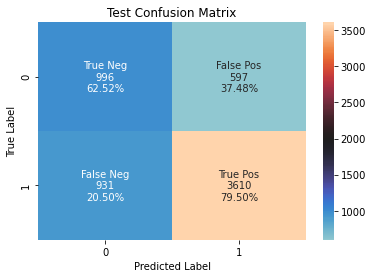

date:180412, rec:001, time:6942.0, label:1.0
Original data 62 CH


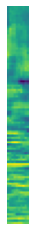

In [55]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, 10)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### Logistic Regression with finite difference regularization

In [56]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'
CH = 23
timewindow = 10



Train loss for epoch 0: 0.5576699376106262
Val loss for epoch 0: 0.4600393772125244
Train loss for epoch 1: 0.536664605140686
Val loss for epoch 1: 0.45634520053863525
1
Train loss for epoch 2: 0.5270363092422485
Val loss for epoch 2: 0.4584202170372009
Train loss for epoch 3: 0.5218560695648193
Val loss for epoch 3: 0.45974522829055786
Train loss for epoch 4: 0.5193572044372559
Val loss for epoch 4: 0.45698103308677673
Train loss for epoch 5: 0.51749587059021
Val loss for epoch 5: 0.46562767028808594
Train loss for epoch 6: 0.5156861543655396
Val loss for epoch 6: 0.44606056809425354
6
Train loss for epoch 7: 0.5148633718490601
Val loss for epoch 7: 0.4560880661010742
Train loss for epoch 8: 0.5142927765846252
Val loss for epoch 8: 0.455301433801651
Train loss for epoch 9: 0.514357328414917
Val loss for epoch 9: 0.4481469690799713
Train loss for epoch 10: 0.5141926407814026
Val loss for epoch 10: 0.4693392217159271
Train loss for epoch 11: 0.5140335559844971
Val loss for epoch 11: 0.4

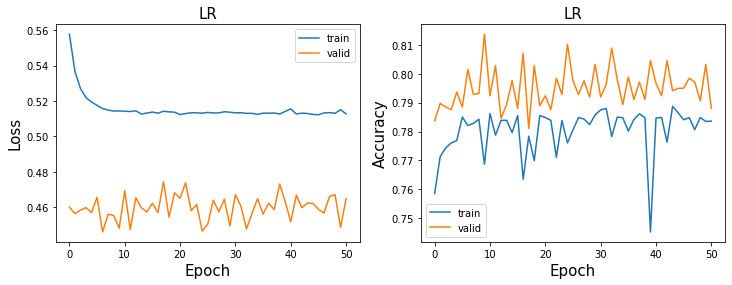

Train loss for epoch 0: 0.6062473654747009
Val loss for epoch 0: 0.4883762300014496
Train loss for epoch 1: 0.5604888796806335
Val loss for epoch 1: 0.4874497950077057
1
Train loss for epoch 2: 0.5563557147979736
Val loss for epoch 2: 0.4723881483078003
2
Train loss for epoch 3: 0.5529890656471252
Val loss for epoch 3: 0.4736938178539276
Train loss for epoch 4: 0.5528282523155212
Val loss for epoch 4: 0.49165117740631104
Train loss for epoch 5: 0.5511560440063477
Val loss for epoch 5: 0.48421138525009155
Train loss for epoch 6: 0.5508975982666016
Val loss for epoch 6: 0.4866071343421936
Train loss for epoch 7: 0.5507144927978516
Val loss for epoch 7: 0.4969857633113861
Train loss for epoch 8: 0.5510231256484985
Val loss for epoch 8: 0.49949902296066284
Train loss for epoch 9: 0.5509728193283081
Val loss for epoch 9: 0.495675265789032
Train loss for epoch 10: 0.5514771938323975
Val loss for epoch 10: 0.4844190776348114
Train loss for epoch 11: 0.5496655702590942
Val loss for epoch 11: 0

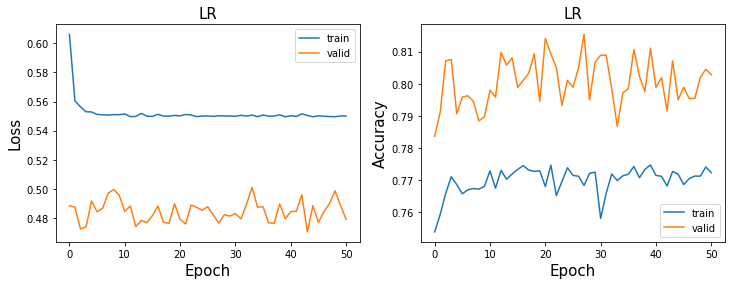

Train loss for epoch 0: 0.6506728529930115
Val loss for epoch 0: 0.49986064434051514
Train loss for epoch 1: 0.5763927102088928
Val loss for epoch 1: 0.5155768990516663
Train loss for epoch 2: 0.5713855028152466
Val loss for epoch 2: 0.5098440647125244
Train loss for epoch 3: 0.569346010684967
Val loss for epoch 3: 0.5019204020500183
Train loss for epoch 4: 0.5666883587837219
Val loss for epoch 4: 0.5008293986320496
Train loss for epoch 5: 0.5665671229362488
Val loss for epoch 5: 0.5074388980865479
Train loss for epoch 6: 0.5663598775863647
Val loss for epoch 6: 0.5083795189857483
Train loss for epoch 7: 0.5674394369125366
Val loss for epoch 7: 0.49438753724098206
7
Train loss for epoch 8: 0.5666577816009521
Val loss for epoch 8: 0.5022857189178467
Train loss for epoch 9: 0.5661479830741882
Val loss for epoch 9: 0.5250833630561829
Train loss for epoch 10: 0.5678502321243286
Val loss for epoch 10: 0.5046976208686829
Train loss for epoch 11: 0.5656840205192566
Val loss for epoch 11: 0.49

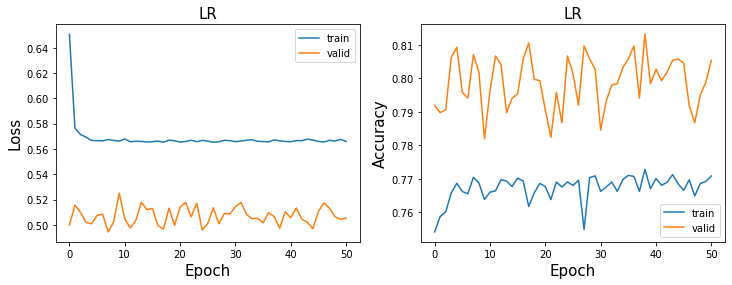

In [57]:
for alpha in alphas:
    model = GLM(100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) 

In [58]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [1,50,100]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CH23_' in s and reg_alpha in s and '_valbalanced' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1          6
50        43
100        7


/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff1_EPOCH6_REDUCEsum_valbalanced.pt


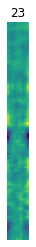

validation loss:0.44606056809425354 accuracy:0.8014769765421372
0.5
test loss:0.5340996980667114 accuracy:0.7420932507336159
0.74029994


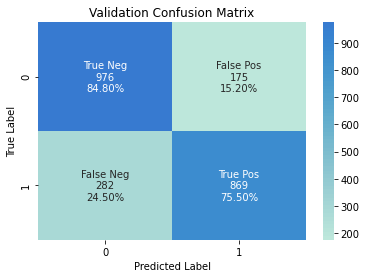

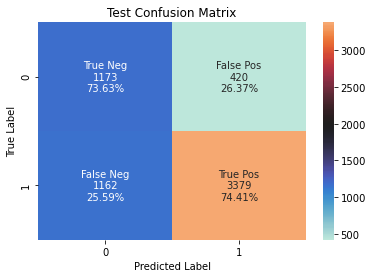

date:180412, rec:001, time:6942.0, label:1.0
Original data 62 CH


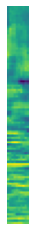

/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff50_EPOCH43_REDUCEsum_valbalanced.pt


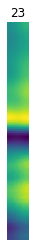

validation loss:0.47039780020713806 accuracy:0.8071242397914856
0.5
test loss:0.5531715154647827 accuracy:0.7349201173785458
0.74029994


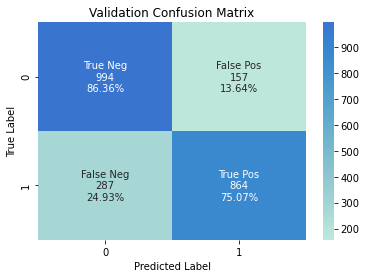

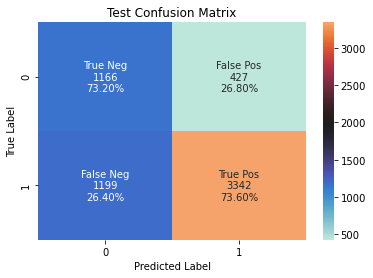

date:180412, rec:001, time:6942.0, label:1.0
Original data 62 CH


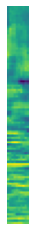

/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/LR_models/LR_CH23_LOSSbce_REGfinite_diff100_EPOCH7_REDUCEsum_valbalanced.pt


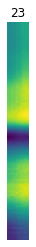

validation loss:0.49438753724098206 accuracy:0.8071242397914856
0.5
test loss:0.5751274228096008 accuracy:0.7254646234104989
0.74029994


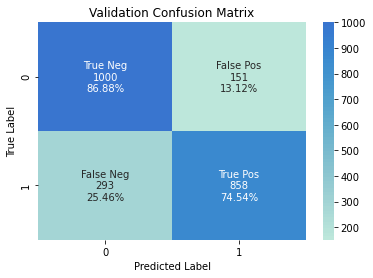

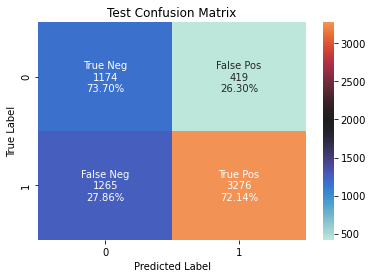

date:180412, rec:001, time:6942.0, label:1.0
Original data 62 CH


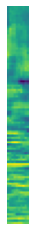

In [59]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, 10)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### SVM without regularization

In [22]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0 
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'none' # expect to be bad, since predictions could be arbitrarily far from boundaries
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [13]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6105479598045349
Val loss for epoch 0: 1.2834664583206177
Train loss for epoch 1: 0.5602447986602783
Val loss for epoch 1: 0.9178999662399292
1
Train loss for epoch 2: 0.4674215018749237
Val loss for epoch 2: 3.1678149700164795
Train loss for epoch 3: 0.5240594744682312
Val loss for epoch 3: 0.9516066312789917
Train loss for epoch 4: 0.4172993004322052
Val loss for epoch 4: 1.5819454193115234
Train loss for epoch 5: 0.4704030156135559
Val loss for epoch 5: 1.1257431507110596
Train loss for epoch 6: 0.3469279408454895
Val loss for epoch 6: 1.4243940114974976
Train loss for epoch 7: 0.3866455554962158
Val loss for epoch 7: 1.1779205799102783
Train loss for epoch 8: 0.33019065856933594
Val loss for epoch 8: 1.365188479423523
Train loss for epoch 9: 0.3815663754940033
Val loss for epoch 9: 1.5121104717254639
Train loss for epoch 10: 0.40764206647872925
Val loss for epoch 10: 1.7473173141479492
Train loss for epoch 11: 0.3409585654735565
Val loss for epoch 11: 1.27

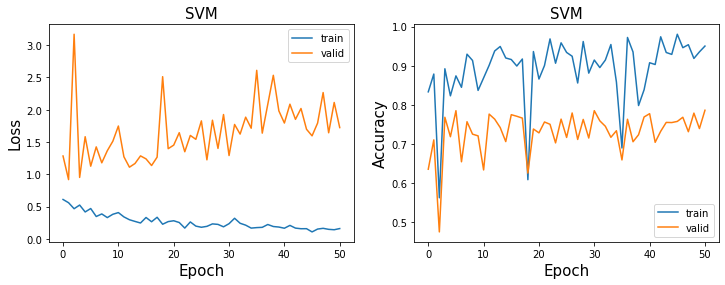

In [14]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [23]:
best_epoch = 1

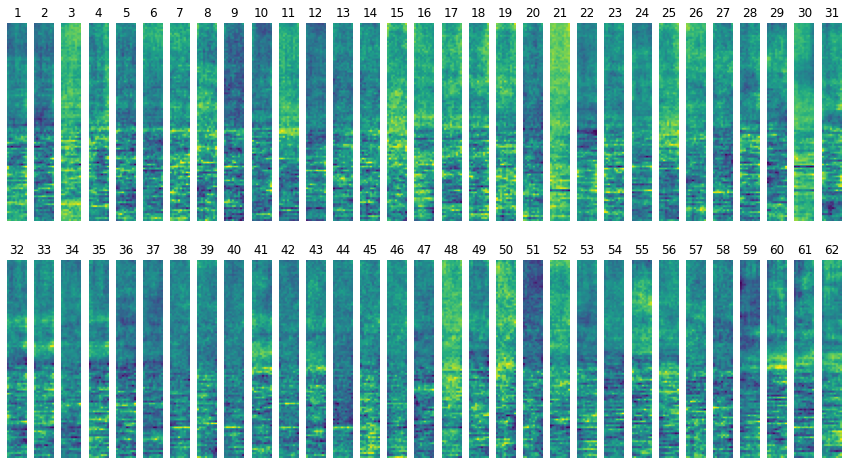

In [24]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [27]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_3 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7428555488586426 accuracy:0.7838461538461539


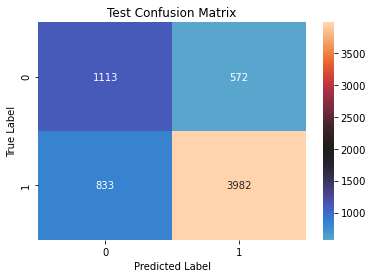

In [28]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


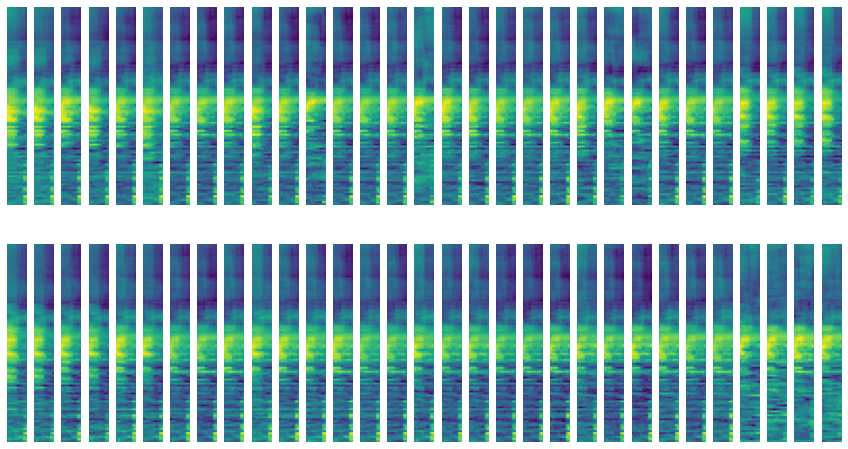

In [30]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_3[0][0], cases_wrong_3[0][1], cases_wrong_3[0][1], cases_wrong_3[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_3[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with L2 regularization

In [31]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5 # have special meaning as margin, corresponding to 1 in the hinge loss
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'l2'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [16]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.142331600189209
Val loss for epoch 0: 2.375016927719116
Train loss for epoch 1: 0.8872479200363159
Val loss for epoch 1: 0.9689788222312927
1
Train loss for epoch 2: 0.9464882612228394
Val loss for epoch 2: 1.0704563856124878
Train loss for epoch 3: 0.8319297432899475
Val loss for epoch 3: 1.3819953203201294
Train loss for epoch 4: 0.9815953969955444
Val loss for epoch 4: 2.2135136127471924
Train loss for epoch 5: 0.9559652209281921
Val loss for epoch 5: 1.3571209907531738
Train loss for epoch 6: 0.9480046629905701
Val loss for epoch 6: 0.958657443523407
6
Train loss for epoch 7: 0.8747104406356812
Val loss for epoch 7: 1.0527974367141724
Train loss for epoch 8: 0.938942551612854
Val loss for epoch 8: 1.816292405128479
Train loss for epoch 9: 1.033324956893921
Val loss for epoch 9: 1.2031350135803223
Train loss for epoch 10: 0.908989667892456
Val loss for epoch 10: 0.6989802718162537
10
Train loss for epoch 11: 0.9314482808113098
Val loss for epoch 11: 1.08010

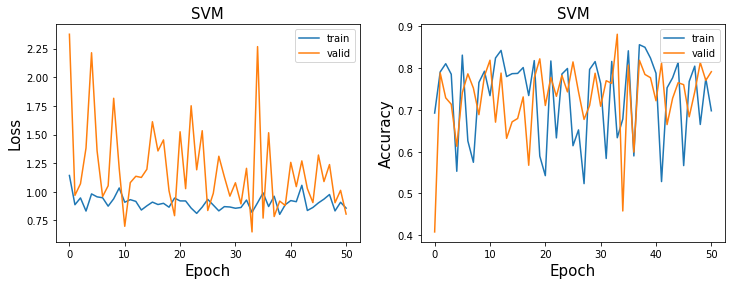

In [17]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [32]:
best_epoch = 33

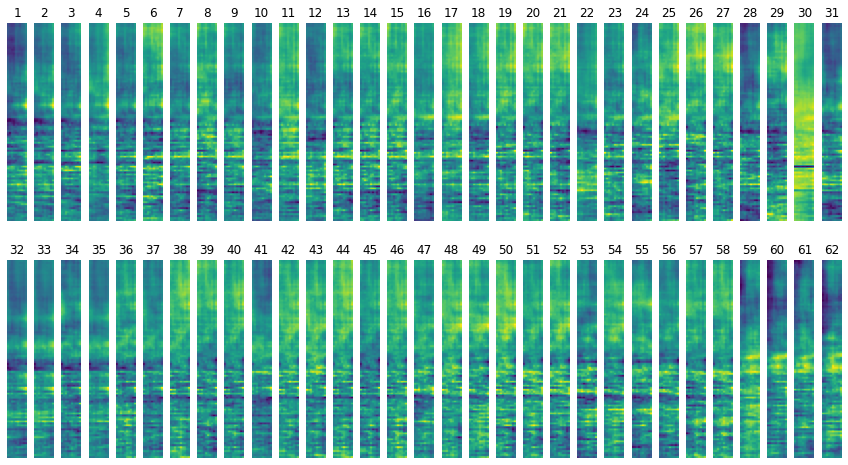

In [33]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [34]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_4 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:1.2684636116027832 accuracy:0.7512307692307693


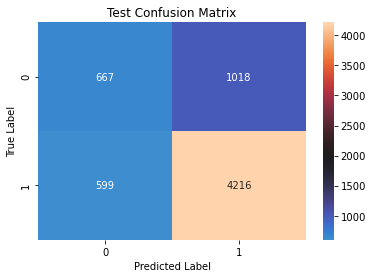

In [35]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


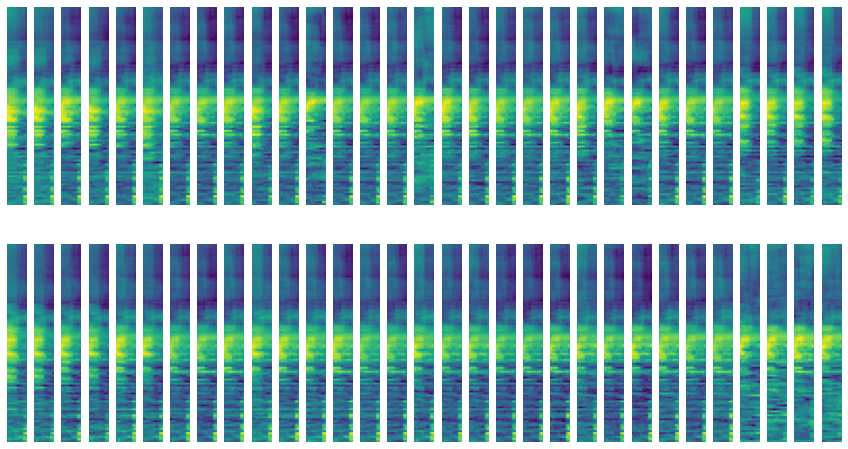

In [36]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_4[0][0], cases_wrong_4[0][1], cases_wrong_4[0][1], cases_wrong_4[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_4[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with finite difference regularization

In [37]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'finite_diff'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [19]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.1333791017532349
Val loss for epoch 0: 1.699452519416809
Train loss for epoch 1: 0.7799455523490906
Val loss for epoch 1: 1.1568527221679688
1
Train loss for epoch 2: 0.8088831305503845
Val loss for epoch 2: 1.5023279190063477
Train loss for epoch 3: 0.7681555151939392
Val loss for epoch 3: 1.125550389289856
3
Train loss for epoch 4: 0.779151201248169
Val loss for epoch 4: 0.9314382076263428
4
Train loss for epoch 5: 0.6864786744117737
Val loss for epoch 5: 1.0832509994506836
Train loss for epoch 6: 0.6971858739852905
Val loss for epoch 6: 1.0215011835098267
Train loss for epoch 7: 0.7639809250831604
Val loss for epoch 7: 1.7163935899734497
Train loss for epoch 8: 0.7523619532585144
Val loss for epoch 8: 1.3559271097183228
Train loss for epoch 9: 0.837641179561615
Val loss for epoch 9: 1.0237863063812256
Train loss for epoch 10: 0.7160231471061707
Val loss for epoch 10: 1.128845453262329
Train loss for epoch 11: 0.7040753364562988
Val loss for epoch 11: 3.2867

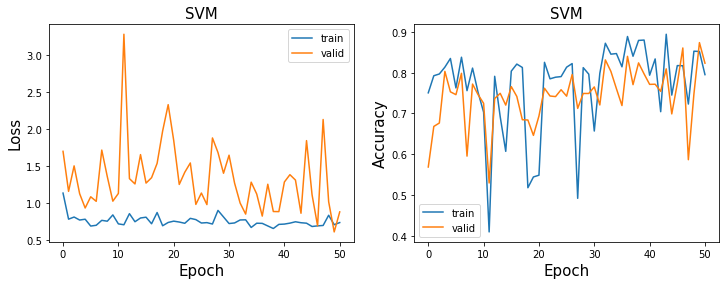

In [20]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [38]:
best_epoch = 49

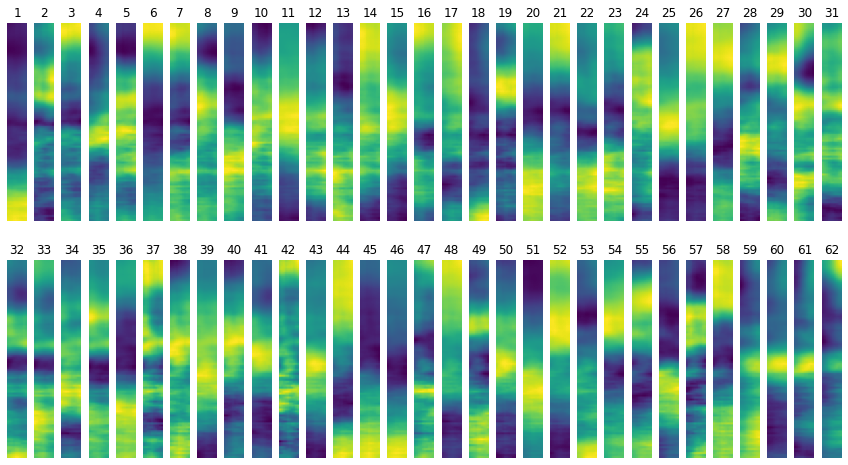

In [39]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [40]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_5 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.8956817984580994 accuracy:0.8355384615384616


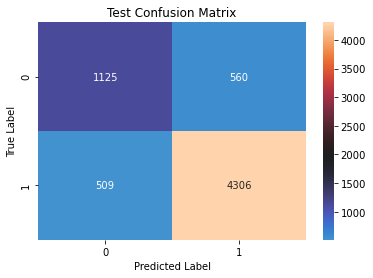

In [41]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


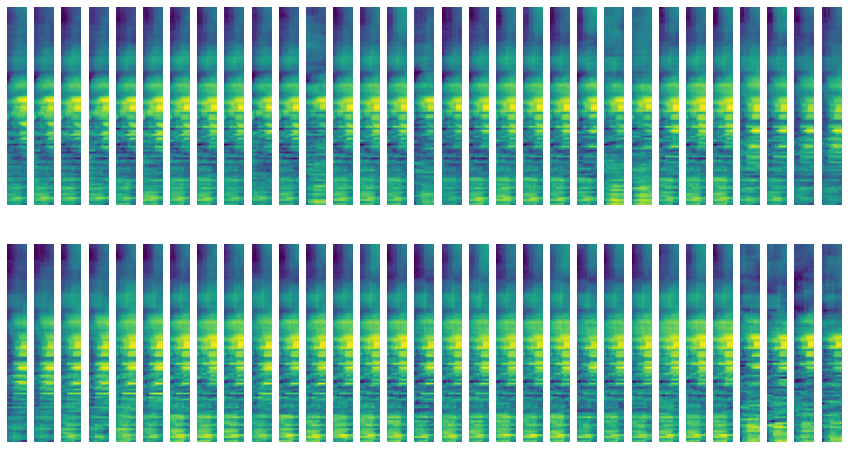

In [42]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_5[0][0], cases_wrong_5[0][1], cases_wrong_5[0][1], cases_wrong_5[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_5[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()